# Import Libraries


In [2]:
import warnings
import pandas as pd
import os
import numpy as np
import scattertext as st
import matplotlib.pyplot as plt
#import spacy
from pprint import pprint
from mlxtend.frequent_patterns import apriori
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

In [3]:
warnings.filterwarnings("ignore")

# Load Data

# Question 3: Text-Mining the Bible

In [4]:
ASV = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/bible_asv.csv")
ASV.head(3)

,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,In the beginning God created the heavens and t...
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,And the earth was waste and void; and darkness...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,"And God said, Let there be light: and there wa..."


# Preprocessing the Dataset


In [6]:
#The focus was to remove stopwords, punctuations, numbers from text
#as well as changing all text to lowercase
import nltk
nltk.download("stopwords")
ASV['text'] = ASV['text'].str.lower()
ASV.text = ASV.text.str.replace('\d+', '')
ASV['text'] = ASV['text'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
ASV['text'] = ASV['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
ASV.text = ASV.text.str.replace('\d+', '')
ASV.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,field,Testaments,Sections,Books,Chapters,Verses,text
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,beginning god created heavens earth
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,earth waste void darkness upon face deep spiri...
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,god said let light light
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,god saw light good god divided light darkness
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,god called light day darkness called night eve...


# Vectorization

In [7]:
#text change into vectors 
vec = TfidfVectorizer()
X = vec.fit_transform(ASV['text'].values.astype('str'))
text = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [8]:
ASV = pd.merge(ASV, text, left_index=True, right_index=True)
ASV = ASV.drop('text',axis=1)
ASV.head()

,Unnamed: 0,field_x,Testaments,Sections,Books,Chapters,Verses,aaron,aarons,abaddon,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA

In [9]:
X_ASV = ASV.drop(ASV.ix[:,0:7].head(0).columns, axis=1)
X_ASV.head(3)

,aaron,aarons,abaddon,abagtha,abanah,abarim,abase,abased,abasing,abated,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
pca = PCA(n_components=50)
pca.fit(X_ASV)
X_ASV_50PCA = pca.transform(X_ASV)

In [11]:
pca = PCA(n_components=2)
pca.fit(X_ASV)
X_ASV_2PCA = pca.transform(X_ASV)

# K-means Clustering

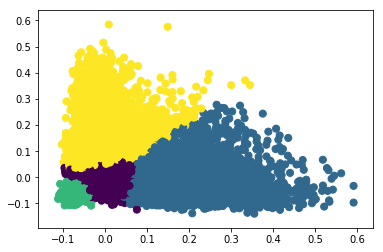

In [12]:
#I chose to use clustering was made into of 4
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_ASV_2PCA )
plt.scatter(X_ASV_2PCA [:, 0], X_ASV_2PCA [:, 1], c=labels,
            s=50, cmap='viridis');

In [13]:
#clustering = AgglomerativeClustering(n_clusters=4).fit(X_ASV_2PCA)
#labels = clustering.labels_
#plt.scatter(X_ASV_2PCA[:, 0], X_ASV_2PCA[:, 1], c=labels, s=40, cmap='viridis')

# Hierarical Clustering

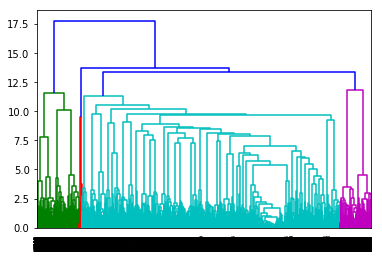

In [14]:
hier = linkage(X_ASV_50PCA, 'ward')
dend = dendrogram(hier)

In [15]:
#clustering = AgglomerativeClustering(n_clusters=4).fit(X_ASV_50PCA)
#labels = clustering.labels_
#plt.scatter(X_ASV_50PCA[:, 0], X_ASV_50PCA[:, 1], c=labels, s=40, cmap='viridis')

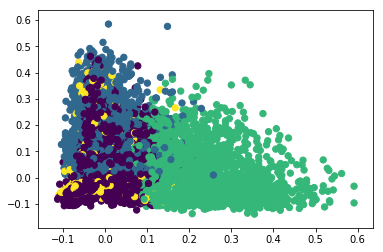

In [16]:
clustering = MiniBatchKMeans(n_clusters=4).fit(X_ASV_50PCA)
labels = clustering.labels_
plt.scatter(X_ASV_50PCA[:, 0], X_ASV_50PCA[:, 1], c=labels, s=40, cmap='viridis')

# Comparison of Clustering based on Labels

In [18]:
#Grouping Old Testtament and New Testament into clusters and 7sections
labels = pd.DataFrame(labels)
labels.columns = ['number_group']
types = pd.merge(ASV, labels, left_index=True, right_index=True)
types.head()

,Unnamed: 0,field_x,Testaments,Sections,Books,Chapters,Verses,aaron,aarons,abaddon,...,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzim,number_group
0,1,1001001,OT,Law,gen,gen_1,gen_1:1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,1001002,OT,Law,gen,gen_1,gen_1:2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,1001003,OT,Law,gen,gen_1,gen_1:3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,1001004,OT,Law,gen,gen_1,gen_1:4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,1001005,OT,Law,gen,gen_1,gen_1:5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [19]:
group_1 = types[types["number_group"]==0]
group_2 = types[types["number_group"]==1]
group_3 = types[types["number_group"]==2]
group_4 = types[types["number_group"]==3]
group_5 = types[types["number_group"]==4]

In [20]:
group_1_count_OT= group_1[group_1['Testaments'] == 'OT'].count()['Testaments']
group_1_count_NT= group_1[group_1['Testaments'] == 'NT'].count()['Testaments']
group_2_count_OT= group_2[group_2['Testaments'] == 'OT'].count()['Testaments']
group_2_count_NT= group_2[group_2['Testaments'] == 'NT'].count()['Testaments']
group_3_count_OT= group_3[group_3['Testaments'] == 'OT'].count()['Testaments']
group_3_count_NT= group_3[group_3['Testaments'] == 'NT'].count()['Testaments']
group_4_count_OT= group_4[group_4['Testaments'] == 'OT'].count()['Testaments']
group_4_count_NT= group_4[group_4['Testaments'] == 'NT'].count()['Testaments']
group_5_count_OT= group_5[group_5['Testaments'] == 'OT'].count()['Testaments']
group_5_count_NT= group_5[group_5['Testaments'] == 'NT'].count()['Testaments']

In [24]:
grouping = {'groups': ["1 Old","1 New","group_2_count_OT",
               "group_2_count_NT","group_3_count_OT","group_3_count_NT","group_4_count_OT",
               "group_4_count_NT","group_5_count_OT","group_5_count_NT"],
     'counts': [group_1_count_OT,group_1_count_NT,group_2_count_OT,group_2_count_NT,group_3_count_OT,
               group_3_count_NT,group_4_count_OT,group_4_count_NT,group_5_count_OT,group_5_count_NT]}





In [25]:
df= pd.DataFrame(data=grouping)
df.sort_values(by = 'counts',ascending= False)

,counts,groups
0,16485,1 Old
1,5938,1 New
4,3687,group_3_count_OT
2,2040,group_2_count_OT
3,968,group_2_count_NT
6,933,group_4_count_OT
7,572,group_4_count_NT
5,480,group_3_count_NT
8,0,group_5_count_OT
9,0,group_5_count_NT


In [ ]:
#From the table above, it can be seen that the group named '1 Old' had
#the highest count of 16485 and "group_5_count_NT" had the least count 
#respectively

In [27]:
section = types.Sections.unique()
clusts = types.number_group.unique()

In [29]:
first = []
second = []
third = []

for x in section :
    x=x
    for j in clusts :
        j=j
        a = types[types["number_group"]== j]
        b = a[a['Sections'] == x].count()['Sections']
        
        first.append({x})
        second.append({j})
        third.append({b})

In [30]:
first = pd.DataFrame(first)
first.columns = ['Sections']
second = pd.DataFrame(second)
second.columns = ['Clusters']
third = pd.DataFrame(third)
third.columns = ['Counts']

df2 = pd.merge(first, second, left_index=True, right_index=True)
df2 = pd.merge(df2, third, left_index=True, right_index=True)
df2.sort_values(by = 'Counts', ascending= False)

,Sections,Clusters,Counts
4,History,0,5626
0,Law,0,3663
12,Prophets,0,3623
8,Wisdom,0,3573
16,Gospels,0,3472
20,Paul,0,1559
2,Law,2,1075
10,Wisdom,2,948
24,Apostles,0,907
14,Prophets,2,862


In [31]:
#From the table above, History as part of the sections had the 
#highest count with its cluster being zero(0) which is kind of strange
#Though Apostles had the least count of 47 but had cluster of 2
#respectively

In [ ]:
#Association was performed here for groupings
apriori(ASV, min_support=0.25, use_colnames=True)